In [1]:
# Perceptron Binary Classifier

import numpy as np
import matplotlib.pyplot as plt
import cPickle

def unpickle( file ):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [9]:
# load cifar-10-small and project down
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels )
 
N = 1000 # New Data Set Size
D = 10 # New Dimensionality
 
# only keep N items
features = features[ 0:N, : ]
labels = labels[ : , 0:N ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
features = features.T

In [10]:
from scipy.misc import logsumexp
    
def numerical_gradient( function, W, delta=1e-06 ):
    function_value = function(W)
    gradient = np.zeros(np.shape(W))
    for y in range(np.shape(W)[0]):
        for x in range(np.shape(W)[1]):
            W[y,x] += delta # Fastest way to do this - less secure than a copy!
            gradient[y,x] = (function(W) - function_value)/delta
            W[y,x] -= delta
    return function_value, gradient
    

class GradientDescender:
    
    def __init__( self, features, labels ):
        self.x = features # training set. Columns are images, elements are features.
        self.y = labels # labels. 1-D array.
        self.reset() # initialize weights and history
    
    def score_function( self, W ):
        return np.dot(W,self.x)
    
    def softmax_loss( self, W ):
        scores = self.score_function(W) # This could improve by only doing used parts!!
        s_t = scores[self.y, range(np.shape(scores)[1])]
        lse = logsumexp(scores, axis=0)
        return np.mean(-s_t + lse)
    
    def epoch( self, step_size ):
        scores = self.score_function(self.W) # Current result
        accuracy = np.mean(np.argmax(scores, axis=0)==labels)
        
        loss, gradient = numerical_gradient(self.softmax_loss, self.W)
        self.W = self.W - step_size * gradient
        return loss, accuracy*100
    
    def reset( self ):
        self.W = np.random.randn(self.x.shape[0],self.x.shape[0])
        self.loss_hist = []
        self.accuracy_hist = []
            
    def train( self, c=0.1, epochs=1000, epsilon=None, reset_before=True ):
        if reset_before: self.reset()
        print "Training..."
        print
        for I in range(epochs):
            L, A = self.epoch(c)
            print "\rEpoch: " + str(I+1) + "\tLoss: " + str(L) + "\tAccuracy: " + str(A) + " %"
            self.loss_hist.append(L)
            self.accuracy_hist.append(A)
            if epsilon != None and L < epsilon: break
        print "Training Complete."
        
    def get_results( self ):
        return self.loss_hist, self.accuracy_hist

In [11]:
GD = GradientDescender(features, labels)
GD.train()
L, A = GD.get_results()

Training...

Epoch: 0	Loss: 5.09995092096	Accuracy: 8.7
Epoch: 1	Loss: 5.05933945681	Accuracy: 8.6
Epoch: 2	Loss: 5.01921240321	Accuracy: 9.0
Epoch: 3	Loss: 4.97956973827	Accuracy: 8.9
Epoch: 4	Loss: 4.94041126231	Accuracy: 8.9
Epoch: 5	Loss: 4.90173659207	Accuracy: 8.9
Epoch: 6	Loss: 4.86354515508	Accuracy: 9.0
Epoch: 7	Loss: 4.82583618547	Accuracy: 9.2
Epoch: 8	Loss: 4.78860872022	Accuracy: 9.2
Epoch: 9	Loss: 4.75186159574	Accuracy: 9.2
Epoch: 10	Loss: 4.71559344437	Accuracy: 9.2
Epoch: 11	Loss: 4.67980269136	Accuracy: 9.4
Epoch: 12	Loss: 4.64448755123	Accuracy: 9.5
Epoch: 13	Loss: 4.60964602427	Accuracy: 9.5
Epoch: 14	Loss: 4.57527589329	Accuracy: 9.5
Epoch: 15	Loss: 4.54137472001	Accuracy: 9.5
Epoch: 16	Loss: 4.5079398423	Accuracy: 9.5
Epoch: 17	Loss: 4.47496837215	Accuracy: 9.6
Epoch: 18	Loss: 4.44245719435	Accuracy: 9.4
Epoch: 19	Loss: 4.41040296684	Accuracy: 9.4
Epoch: 20	Loss: 4.37880212267	Accuracy: 9.3
Epoch: 21	Loss: 4.34765087406	Accuracy: 9.3
Epoch: 22	Loss: 4.31694521854	

Epoch: 186	Loss: 2.41243439728	Accuracy: 18.9
Epoch: 187	Loss: 2.4090366974	Accuracy: 19.0
Epoch: 188	Loss: 2.4056721752	Accuracy: 19.0
Epoch: 189	Loss: 2.40234040307	Accuracy: 19.0
Epoch: 190	Loss: 2.39904096187	Accuracy: 18.9
Epoch: 191	Loss: 2.39577344068	Accuracy: 18.9
Epoch: 192	Loss: 2.39253743657	Accuracy: 18.9
Epoch: 193	Loss: 2.38933255446	Accuracy: 18.9
Epoch: 194	Loss: 2.38615840685	Accuracy: 18.9
Epoch: 195	Loss: 2.38301461364	Accuracy: 19.0
Epoch: 196	Loss: 2.379900802	Accuracy: 18.9
Epoch: 197	Loss: 2.37681660608	Accuracy: 18.8
Epoch: 198	Loss: 2.37376166692	Accuracy: 18.7
Epoch: 199	Loss: 2.37073563226	Accuracy: 18.6
Epoch: 200	Loss: 2.36773815629	Accuracy: 18.8
Epoch: 201	Loss: 2.36476889961	Accuracy: 18.9
Epoch: 202	Loss: 2.36182752896	Accuracy: 18.9
Epoch: 203	Loss: 2.35891371712	Accuracy: 18.9
Epoch: 204	Loss: 2.35602714272	Accuracy: 18.9
Epoch: 205	Loss: 2.35316749013	Accuracy: 18.9
Epoch: 206	Loss: 2.35033444929	Accuracy: 19.0
Epoch: 207	Loss: 2.34752771557	Accurac

Epoch: 367	Loss: 2.1088280623	Accuracy: 22.9
Epoch: 368	Loss: 2.10814126767	Accuracy: 23.1
Epoch: 369	Loss: 2.10746032514	Accuracy: 23.2
Epoch: 370	Loss: 2.106785184	Accuracy: 23.3
Epoch: 371	Loss: 2.10611579398	Accuracy: 23.3
Epoch: 372	Loss: 2.10545210524	Accuracy: 23.3
Epoch: 373	Loss: 2.10479406839	Accuracy: 23.3
Epoch: 374	Loss: 2.10414163445	Accuracy: 23.3
Epoch: 375	Loss: 2.10349475486	Accuracy: 23.2
Epoch: 376	Loss: 2.1028533815	Accuracy: 23.2
Epoch: 377	Loss: 2.10221746666	Accuracy: 23.2
Epoch: 378	Loss: 2.10158696303	Accuracy: 23.2
Epoch: 379	Loss: 2.10096182372	Accuracy: 23.1
Epoch: 380	Loss: 2.10034200225	Accuracy: 23.1
Epoch: 381	Loss: 2.09972745254	Accuracy: 23.1
Epoch: 382	Loss: 2.0991181289	Accuracy: 23.1
Epoch: 383	Loss: 2.09851398604	Accuracy: 23.1
Epoch: 384	Loss: 2.09791497907	Accuracy: 23.1
Epoch: 385	Loss: 2.09732106347	Accuracy: 23.1
Epoch: 386	Loss: 2.09673219512	Accuracy: 23.0
Epoch: 387	Loss: 2.09614833028	Accuracy: 23.0
Epoch: 388	Loss: 2.0955694256	Accuracy:

Epoch: 548	Loss: 2.04495209902	Accuracy: 25.6
Epoch: 549	Loss: 2.04480112946	Accuracy: 25.5
Epoch: 550	Loss: 2.04465137879	Accuracy: 25.5
Epoch: 551	Loss: 2.04450283663	Accuracy: 25.5
Epoch: 552	Loss: 2.04435549271	Accuracy: 25.5
Epoch: 553	Loss: 2.04420933683	Accuracy: 25.4
Epoch: 554	Loss: 2.0440643589	Accuracy: 25.5
Epoch: 555	Loss: 2.04392054892	Accuracy: 25.5
Epoch: 556	Loss: 2.04377789696	Accuracy: 25.5
Epoch: 557	Loss: 2.04363639319	Accuracy: 25.5
Epoch: 558	Loss: 2.04349602785	Accuracy: 25.5
Epoch: 559	Loss: 2.0433567913	Accuracy: 25.5
Epoch: 560	Loss: 2.04321867395	Accuracy: 25.6
Epoch: 561	Loss: 2.04308166631	Accuracy: 25.6
Epoch: 562	Loss: 2.04294575898	Accuracy: 25.6
Epoch: 563	Loss: 2.04281094262	Accuracy: 25.6
Epoch: 564	Loss: 2.04267720799	Accuracy: 25.6
Epoch: 565	Loss: 2.04254454593	Accuracy: 25.6
Epoch: 566	Loss: 2.04241294736	Accuracy: 25.7
Epoch: 567	Loss: 2.04228240327	Accuracy: 25.7
Epoch: 568	Loss: 2.04215290474	Accuracy: 25.7
Epoch: 569	Loss: 2.04202444293	Accur

Epoch: 727	Loss: 2.03044490043	Accuracy: 26.4
Epoch: 728	Loss: 2.03040732506	Accuracy: 26.4
Epoch: 729	Loss: 2.03037002752	Accuracy: 26.4
Epoch: 730	Loss: 2.03033300563	Accuracy: 26.4
Epoch: 731	Loss: 2.0302962572	Accuracy: 26.4
Epoch: 732	Loss: 2.03025978008	Accuracy: 26.3
Epoch: 733	Loss: 2.03022357212	Accuracy: 26.3
Epoch: 734	Loss: 2.0301876312	Accuracy: 26.3
Epoch: 735	Loss: 2.03015195522	Accuracy: 26.3
Epoch: 736	Loss: 2.0301165421	Accuracy: 26.4
Epoch: 737	Loss: 2.03008138975	Accuracy: 26.4
Epoch: 738	Loss: 2.03004649613	Accuracy: 26.5
Epoch: 739	Loss: 2.0300118592	Accuracy: 26.5
Epoch: 740	Loss: 2.02997747694	Accuracy: 26.5
Epoch: 741	Loss: 2.02994334736	Accuracy: 26.5
Epoch: 742	Loss: 2.02990946847	Accuracy: 26.5
Epoch: 743	Loss: 2.02987583829	Accuracy: 26.5
Epoch: 744	Loss: 2.02984245488	Accuracy: 26.5
Epoch: 745	Loss: 2.0298093163	Accuracy: 26.5
Epoch: 746	Loss: 2.02977642063	Accuracy: 26.5
Epoch: 747	Loss: 2.02974376597	Accuracy: 26.5
Epoch: 748	Loss: 2.02971135044	Accuracy

Epoch: 910	Loss: 2.0266169712	Accuracy: 26.4
Epoch: 911	Loss: 2.02660671291	Accuracy: 26.4
Epoch: 912	Loss: 2.02659652402	Accuracy: 26.4
Epoch: 913	Loss: 2.02658640401	Accuracy: 26.4
Epoch: 914	Loss: 2.02657635239	Accuracy: 26.4
Epoch: 915	Loss: 2.02656636868	Accuracy: 26.4
Epoch: 916	Loss: 2.02655645238	Accuracy: 26.4
Epoch: 917	Loss: 2.02654660301	Accuracy: 26.4
Epoch: 918	Loss: 2.02653682008	Accuracy: 26.4
Epoch: 919	Loss: 2.02652710313	Accuracy: 26.4
Epoch: 920	Loss: 2.02651745167	Accuracy: 26.4
Epoch: 921	Loss: 2.02650786523	Accuracy: 26.4
Epoch: 922	Loss: 2.02649834335	Accuracy: 26.4
Epoch: 923	Loss: 2.02648888556	Accuracy: 26.5
Epoch: 924	Loss: 2.02647949142	Accuracy: 26.5
Epoch: 925	Loss: 2.02647016044	Accuracy: 26.5
Epoch: 926	Loss: 2.0264608922	Accuracy: 26.5
Epoch: 927	Loss: 2.02645168624	Accuracy: 26.5
Epoch: 928	Loss: 2.0264425421	Accuracy: 26.5
Epoch: 929	Loss: 2.02643345936	Accuracy: 26.5
Epoch: 930	Loss: 2.02642443756	Accuracy: 26.5
Epoch: 931	Loss: 2.02641547628	Accura

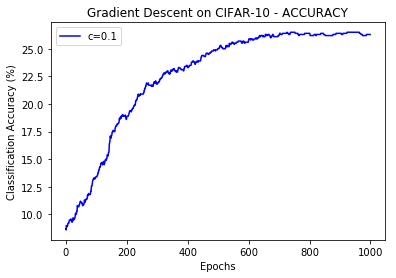

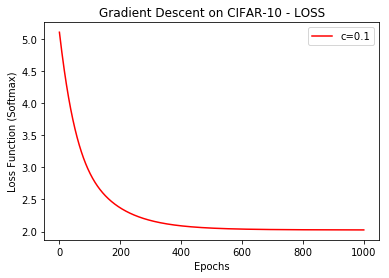

In [12]:
#%matplotlib notebook

plt.title("Gradient Descent on CIFAR-10 - ACCURACY")
plt.xlabel("Epochs")
plt.ylabel("Classification Accuracy (%)")
plt.plot(range(len(A)),A,"b-", label="c=0.1")
plt.legend()

plt.show()

plt.title("Gradient Descent on CIFAR-10 - LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss Function (Softmax)")
plt.plot(range(len(L)),L,"r-", label="c=0.1")
plt.legend()

plt.show()